In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("C:/Users/Gokul Rejithkumar/Desktop/ML/datasets/creditcardfraud/creditcard.csv")

In [4]:
data = data.drop(['Time'], axis = 1)
X = data.drop(['Class'], axis = 1)
y = data['Class']
#Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 444, shuffle = True, stratify = y)

In [6]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 444)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

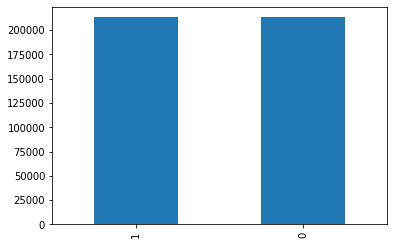

In [7]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_new, y_train_new)
train_pred_sm = model.predict(X_train_new)
# prediction for Testing data
test_pred_sm = model.predict(X_test)
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy score for Training Dataset =  0.9999976551801759
Accuracy score for Testing Dataset =  0.9992696834358585
Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          213235       1  213236
1               0  213236  213236
All        213235  213237  426472
